In [1]:
import import_ipynb  
import utils         
import pandas as pd
import os

os.makedirs("output/figures", exist_ok=True)

In [2]:
years = [2017,2018,2019,2020,2021,2022,2023,2024,2025]
philly_crime_all = utils.load_philly_crime_data(years)

<string>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


                  non_game_crime  game_crime  avg_game_crime  \
distance_band_km                                               
0–1km                       1070         145        1.647727   
1–5km                      66954        1797       20.420455   
5–10km                    259512        6983       79.352273   
>10km                     900807       23878      271.340909   

                  avg_non_game_crime  delta_crime  
distance_band_km                                   
0–1km                       0.359302     1.288426  
1–5km                      22.482874    -2.062420  
5–10km                     87.143049    -7.790776  
>10km                     302.487240   -31.146331  


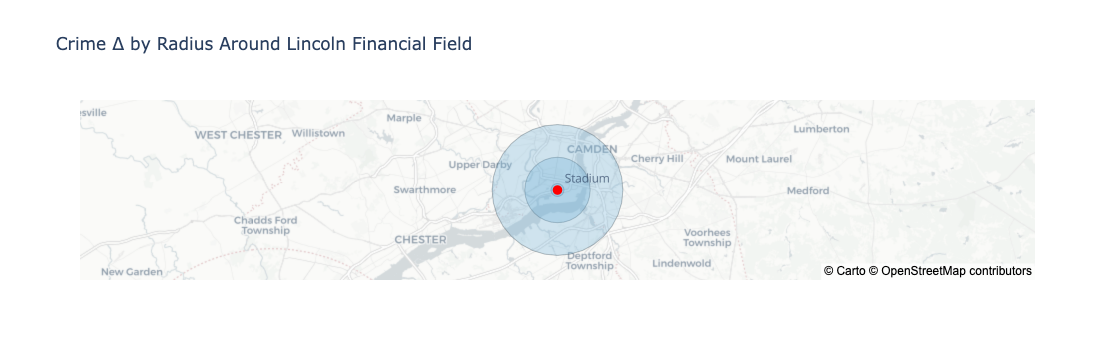

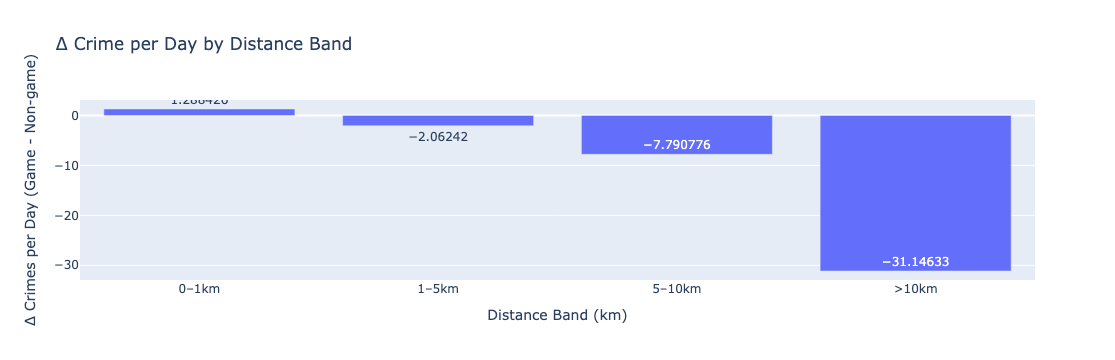

(Figure({
     'data': [{'colorscale': [[0.0, 'rgb(247,251,255)'], [0.125,
                              'rgb(222,235,247)'], [0.25, 'rgb(198,219,239)'],
                              [0.375, 'rgb(158,202,225)'], [0.5,
                              'rgb(107,174,214)'], [0.625, 'rgb(66,146,198)'],
                              [0.75, 'rgb(33,113,181)'], [0.875, 'rgb(8,81,156)'],
                              [1.0, 'rgb(8,48,107)']],
               'geojson': {'bbox': (-75.17648315284119, 39.89390817210438,
                                    -75.15851684715881, 39.90769113480733),
                           'features': [{'bbox': (-75.17648315284119,
                                                  39.89390817210438,
                                                  -75.15851684715881,
                                                  39.90769113480733),
                                         'geometry': {'coordinates': (((-
                                                            

In [3]:
# 1. Define Stadium Coordinates
lincoln_field = (-75.1675, 39.9008)

# 2. Preprocess Crime Data

philly_processed = utils.preprocess_crime_data(philly_crime_all, stadium_coords=lincoln_field, date_col='dispatch_date_time')

# 3. Load Eagles Game Dates
# Load all Eagles games from 2021–2024
eagles_games_all = utils.load_all_eagles_games()

# Filter to home games only
home_games = eagles_games_all[eagles_games_all["Location"] == "Home"]

# 4. Tag Game Windows
philly_tagged = utils.tag_game_windows(
    df=philly_processed,
    games_df=home_games,
    team_name="Eagles",
)

# 5. Compute Δ Crime by Distance Bands
philly_delta_by_distance = utils.compute_distance_crime_delta(
    philly_tagged,
    bins=[0,1000, 5000, 10000]
)

# Plot and save
utils.plot_stadium_radii_map_with_bar_chart(
    stadium_coords=lincoln_field,
    crime_df=philly_tagged,
    delta_df=philly_delta_by_distance,
    radii_meters=[1000, 5000, 10000],
    title="Crime Δ by Radius Around Lincoln Financial Field",
    zoom=9,
    save_path_map="output/figures/philly_radius_map.png",
    save_path_bar="output/figures/philly_gameday_distances_bar.png"
)






This shows a few things:
- Overall the crime rate on eagles game days causes a decrease in crime in philly as a whole
- However close to the stadium there can be seen that there is an increase in crime rates within the kilometer around the stadium on game days
- The reason crime rate decreases so much is due to the fact that it is a sunday and crime rates in philly are much lower on sundays
- the reason the decrease size increases as we go further out is due to the increase in size that this represents